# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2022-09-29 21:09:52
Persistent Unique Scan ID: 'dea96529-1f9e-430a-9c17-513bbb9c0379'


New stream: 'primary'


+-----------+------------+-------------------------+-------------+------------+
|   seq_num |       time | aperture_horizontalSize | w9_duration |    w9_mean |
+-----------+------------+-------------------------+-------------+------------+
|         1 | 21:10:27.7 |                   0.000 |      35.054 |      0.000 |


|         2 | 21:10:56.8 |                   0.400 |      28.845 | 459483826166.747 |


|         3 | 21:11:26.9 |                   0.800 |      29.851 | 21705901626084.516 |


|         4 | 21:11:56.0 |                   1.200 |      28.851 | 70317918327588.344 |


|         5 | 21:12:26.4 |                   1.600 |      30.072 | 168418312414274.781 |


|         6 | 21:12:55.6 |                   2.000 |      28.930 | 346875726031568.125 |


+-----------+------------+-------------------------+-------------+------------+
generator scan ['dea96529'] (scan num: 1)





                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2022-09-29 21:10:27.755460024                      0.0   
2       2022-09-29 21:10:56.877260685                      0.4   
3       2022-09-29 21:11:26.977257967                      0.8   
4       2022-09-29 21:11:56.070786953                      1.2   
5       2022-09-29 21:12:26.411286116                      1.6   
6       2022-09-29 21:12:55.622165442                      2.0   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   
6        {"models": {"arbitraryMagFie

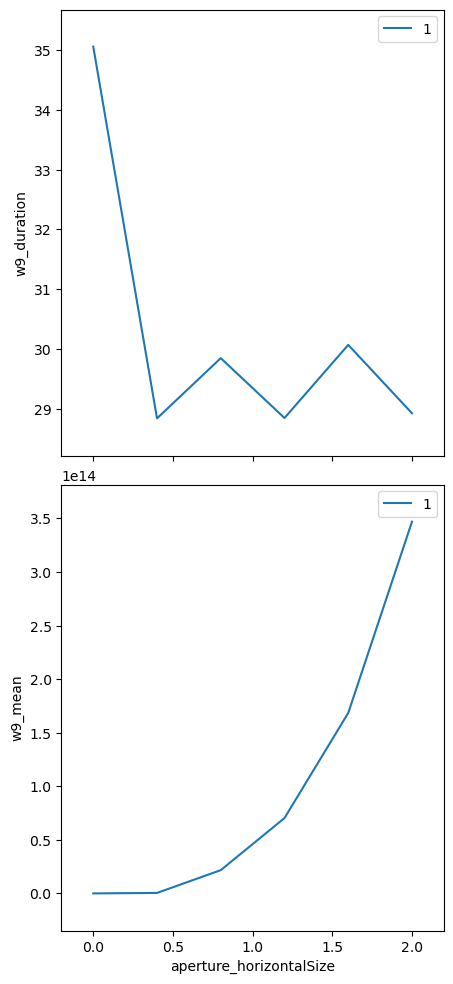

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"
w9.duration.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 6))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (6, 42, 960)


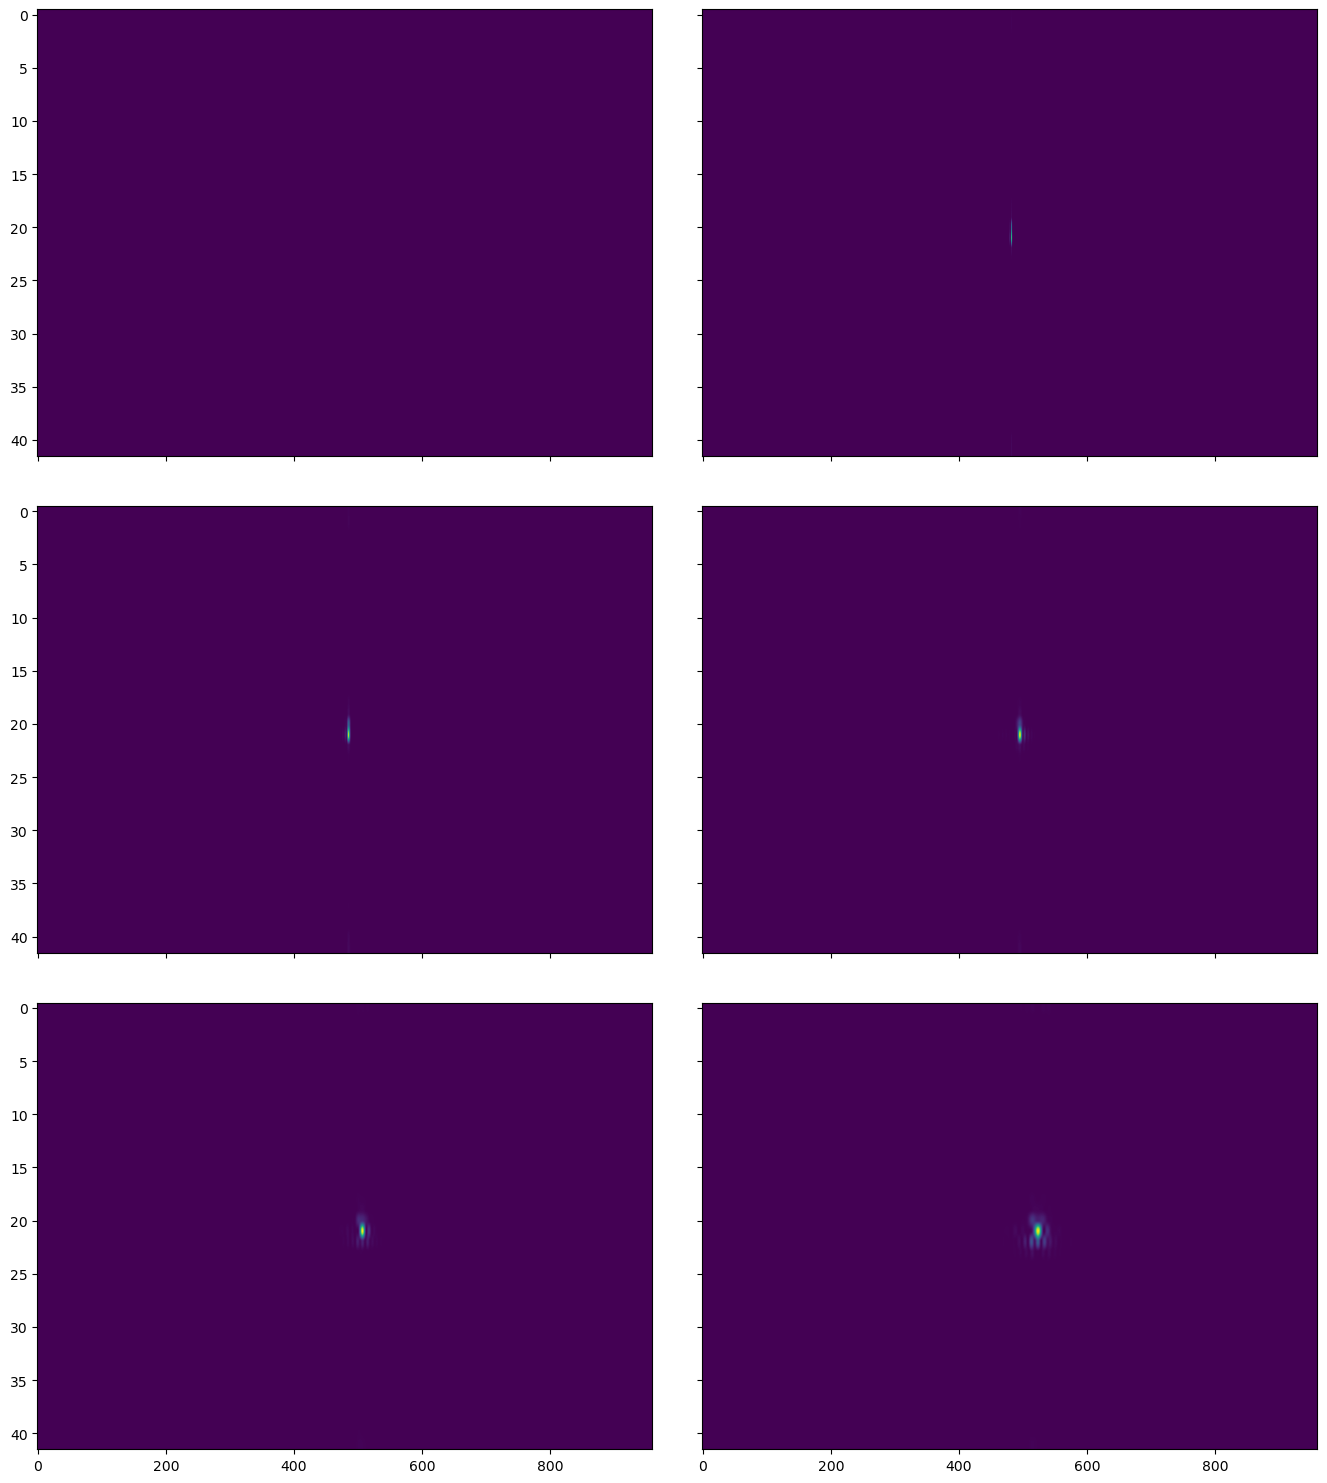

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beamline" Shadow3 simulations

This example repeats the above simulation, but instead uses Shadow3 to run the simulation. 



Transient Scan ID: 1     Time: 2022-09-29 21:12:58
Persistent Unique Scan ID: '6fd64768-07b6-4b43-a8ad-99073c69d58b'


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
New stream: 'primary'
+-----------+------------+-------------------------+-------------+------------+
|   seq_num |       time | aperture_horizontalSize | w9_duration |    w9_mean |
+-----------+------------+-------------------------+-------------+------------+
|         1 | 21:13:07.6 |                   0.000 |       8.297 |      0.000 |


|         2 | 21:13:15.3 |                   0.400 |       7.260 |      0.049 |


|         3 | 21:13:23.0 |                   0.800 |       7.265 |      0.100 |


|         4 | 21:13:30.7 |                   1.200 |       7.278 |      0.152 |


|         5 | 21:13:38.4 |                   1.600 |       7.294 |      0.204 |


|         6 | 21:13:46.1 |                   2.000 |       7.273 |      0.256 |


+-----------+------------+-------------------------+-------------+------------+
generator scan ['6fd64768'] (scan num: 1)





getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2022-09-29 21:13:07.699846506                      0.0   
2       2022-09-29 21:13:15.354675055                      0.4   
3       2022-09-29 21:13:23.027607918                      0.8   
4       2022-09-29 21:13:30.740302324                      1.2   
5       2022-09-29 21:13:38.466347456                      1.6   
6       2022-09-29 21:13:46.155662537                      2.0   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"beamStatisticsReport": {"driftDiv...   
2        {"models": {"beamStatisticsReport": {"driftDiv...   
3        {"models": {"beamStatisticsReport": {"driftDiv...   
4        {"models": {"beamStatisticsReport": {"driftDiv...   
5        {"models": {"beamStatisticsReport": {"driftDiv...   
6        {"models": {"beamStatisticsR

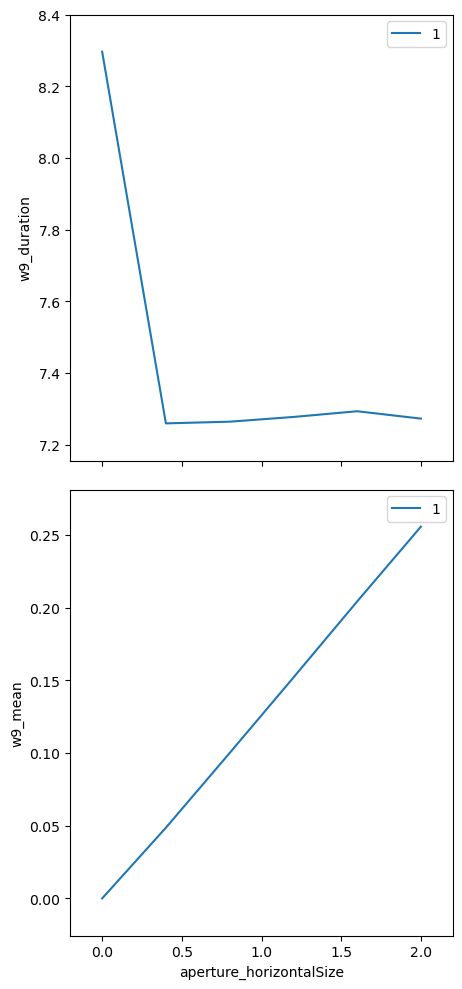

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"
w9.duration.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 6))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (6, 100, 100)


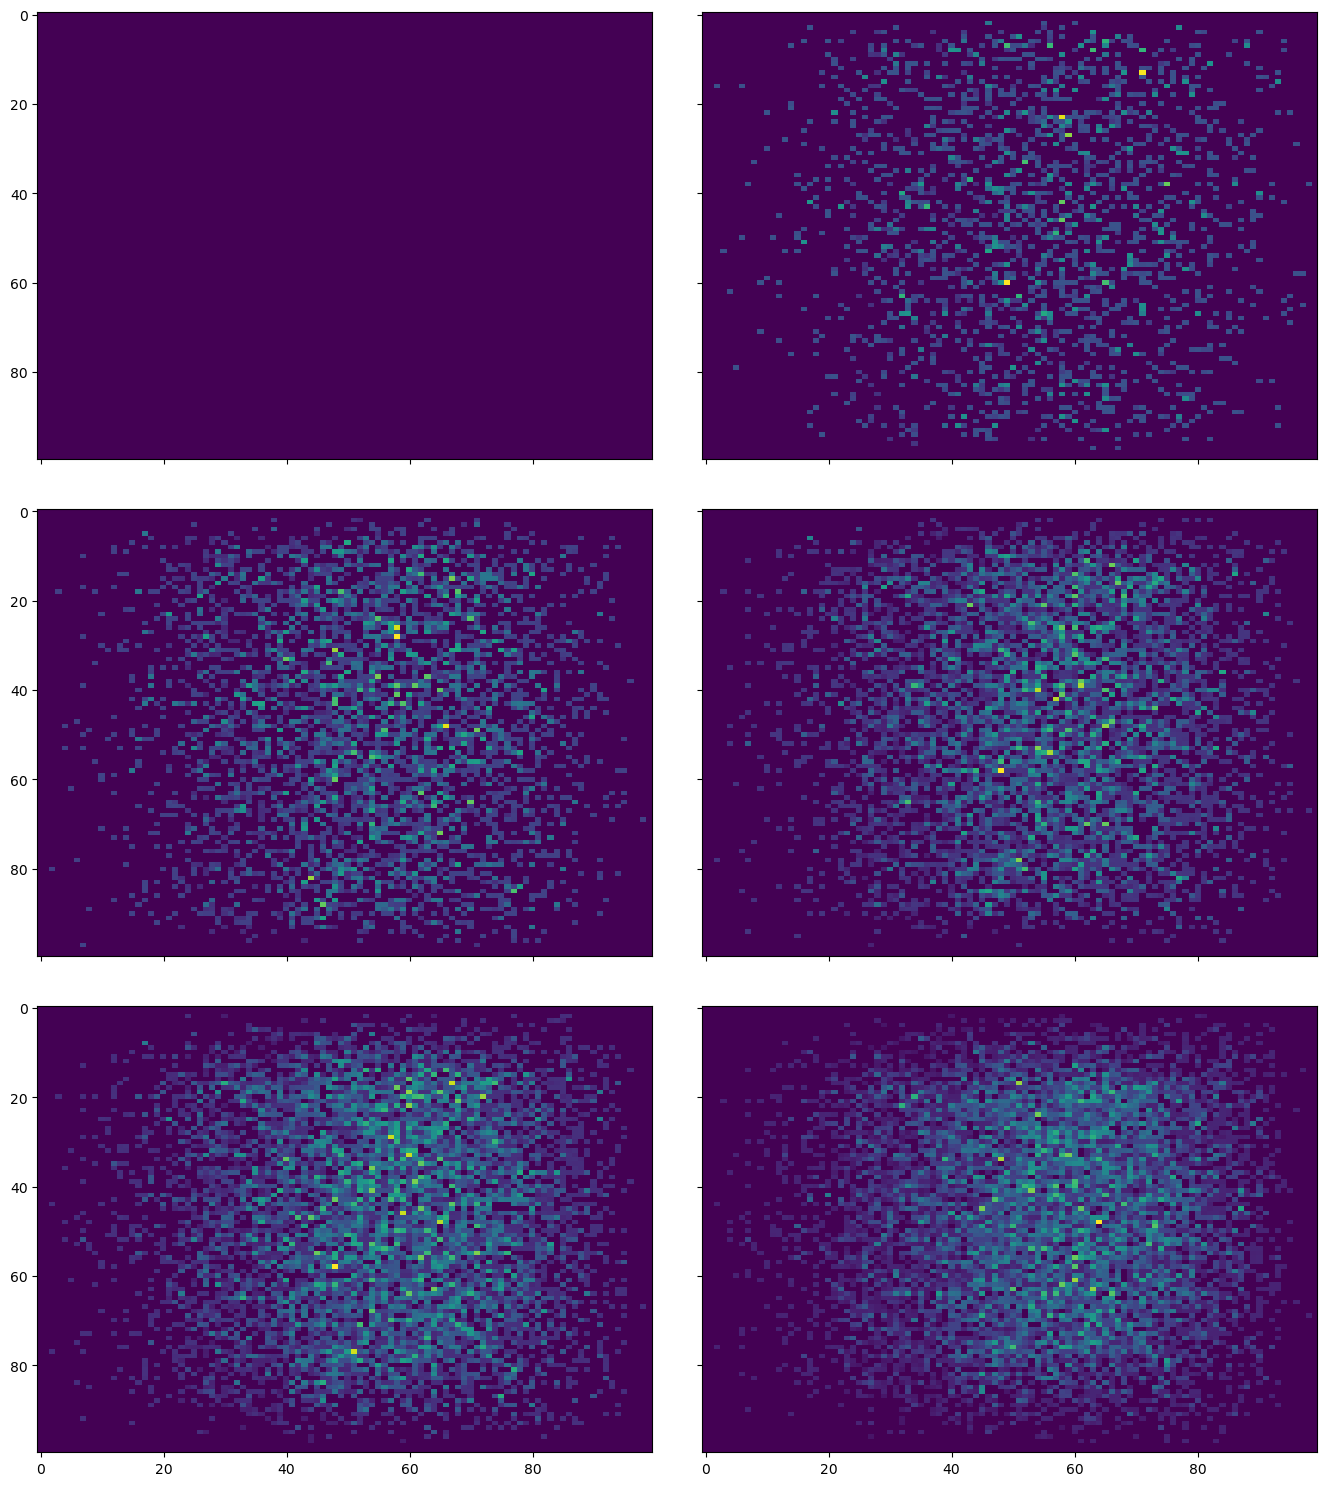

In [4]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.



Transient Scan ID: 1     Time: 2022-09-29 21:13:49
Persistent Unique Scan ID: 'fc35273b-6ded-406a-a65b-2b5790d53c48'


New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | toroid_r_maj | bsr_duration |
+-----------+------------+--------------+--------------+
|         1 | 21:13:55.0 |    10000.000 |        5.250 |


|         2 | 21:14:00.3 |    12000.000 |        5.221 |


|         3 | 21:14:05.7 |    14000.000 |        5.225 |


|         4 | 21:14:10.9 |    16000.000 |        5.196 |


|         5 | 21:14:16.3 |    18000.000 |        5.203 |


|         6 | 21:14:21.6 |    20000.000 |        5.209 |


|         7 | 21:14:26.8 |    22000.000 |        5.178 |


|         8 | 21:14:32.1 |    24000.000 |        5.202 |


|         9 | 21:14:37.5 |    26000.000 |        5.194 |


|        10 | 21:14:43.8 |    28000.000 |        6.209 |


|        11 | 21:14:49.1 |    30000.000 |        5.194 |


|        12 | 21:14:54.4 |    32000.000 |        5.204 |


|        13 | 21:14:59.7 |    34000.000 |        5.217 |


|        14 | 21:15:05.0 |    36000.000 |        5.208 |


|        15 | 21:15:10.3 |    38000.000 |        5.207 |


|        16 | 21:15:16.6 |    40000.000 |        6.229 |


|        17 | 21:15:22.0 |    42000.000 |        5.204 |


|        18 | 21:15:27.3 |    44000.000 |        5.206 |


|        19 | 21:15:32.7 |    46000.000 |        5.265 |


|        20 | 21:15:38.0 |    48000.000 |        5.206 |


|        21 | 21:15:43.3 |    50000.000 |        5.198 |
+-----------+------------+--------------+--------------+
generator scan ['fc35273b'] (scan num: 1)





                                 time  \
seq_num                                 
1       2022-09-29 21:13:55.041409254   
2       2022-09-29 21:14:00.371839285   
3       2022-09-29 21:14:05.700571537   
4       2022-09-29 21:14:10.995662451   
5       2022-09-29 21:14:16.303743839   
6       2022-09-29 21:14:21.612999678   
7       2022-09-29 21:14:26.884645700   
8       2022-09-29 21:14:32.184056997   
9       2022-09-29 21:14:37.504976749   
10      2022-09-29 21:14:43.832283974   
11      2022-09-29 21:14:49.123724937   
12      2022-09-29 21:14:54.432706594   
13      2022-09-29 21:14:59.749847651   
14      2022-09-29 21:15:05.072203159   
15      2022-09-29 21:15:10.379047155   
16      2022-09-29 21:15:16.698621035   
17      2022-09-29 21:15:22.000601768   
18      2022-09-29 21:15:27.345112324   
19      2022-09-29 21:15:32.716326237   
20      2022-09-29 21:15:38.040185928   
21      2022-09-29 21:15:43.340137005   

                                      bsr_sirepo_data_js

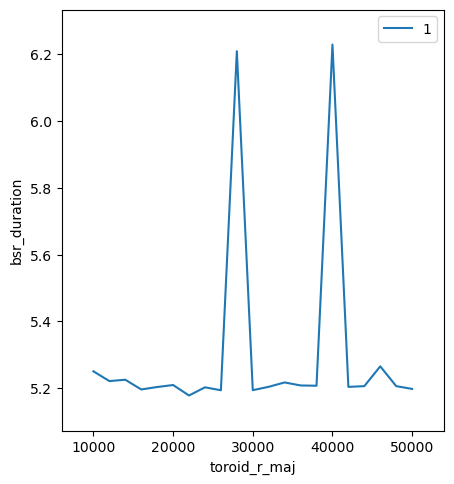

In [5]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"
bsr.duration.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

/tmp/ipykernel_5914/1375322784.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16, 4))


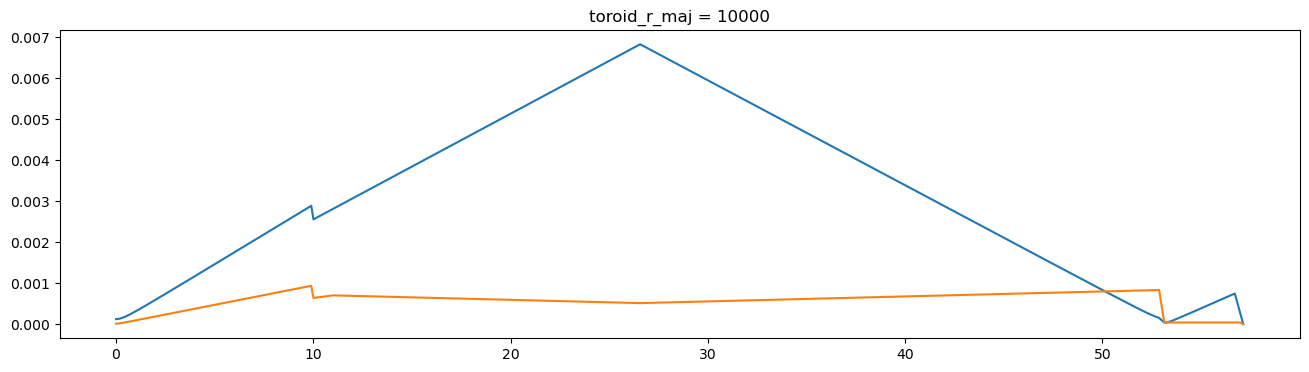

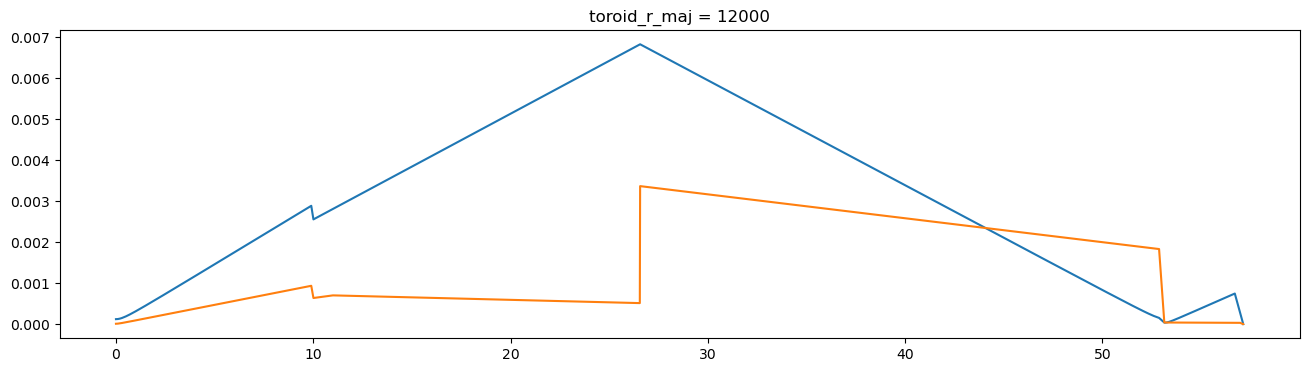

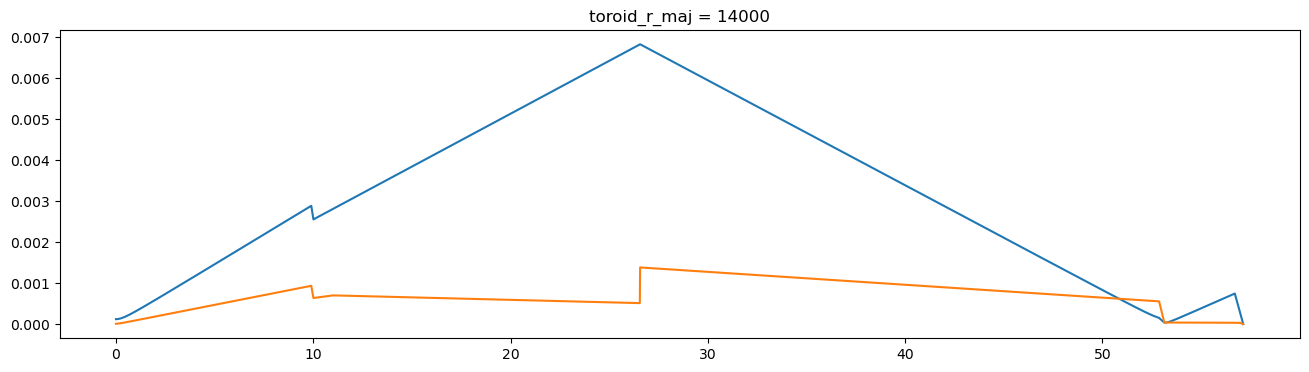

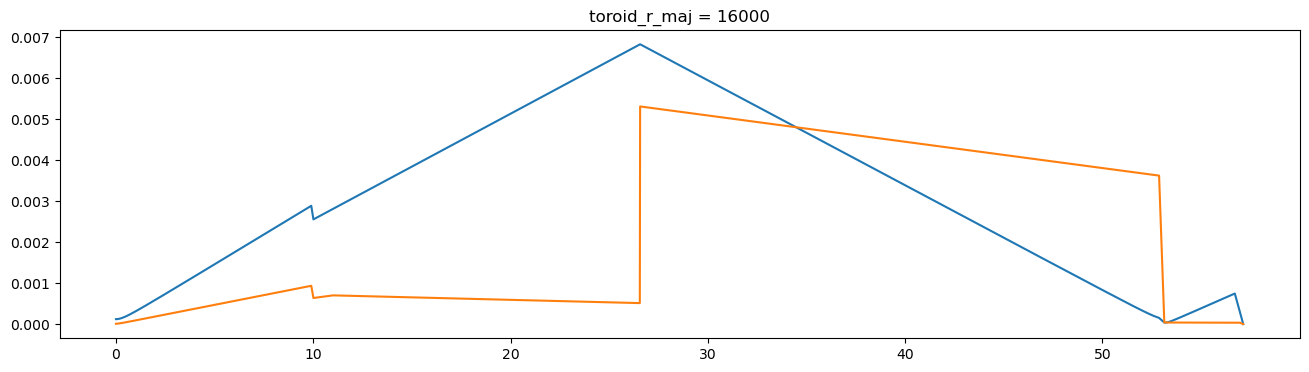

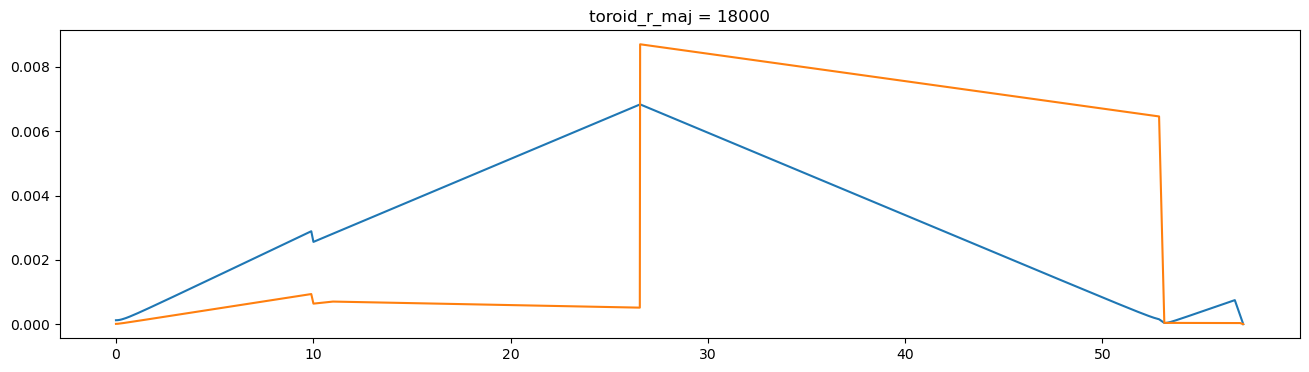

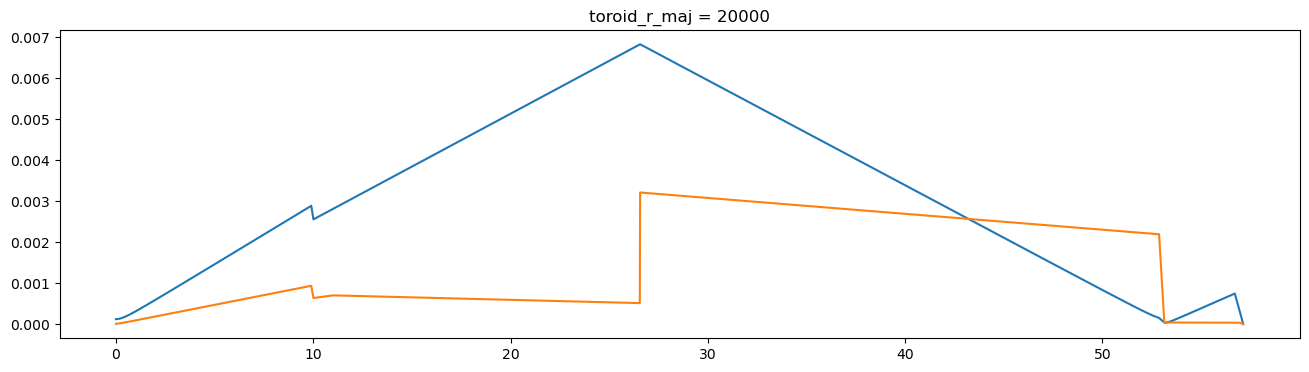

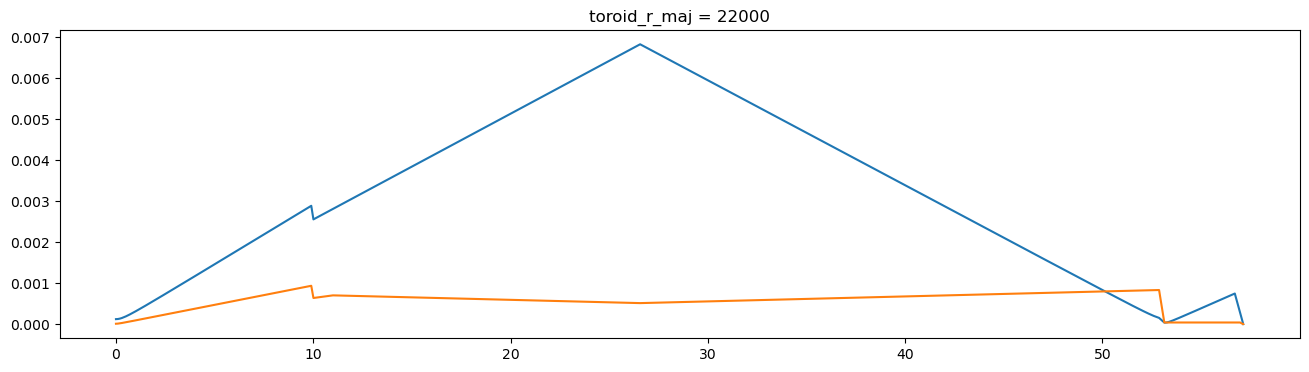

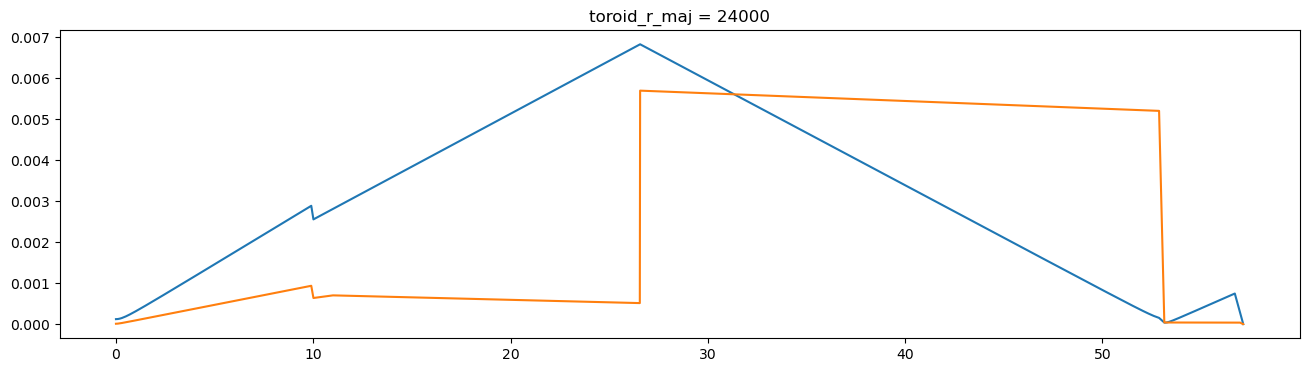

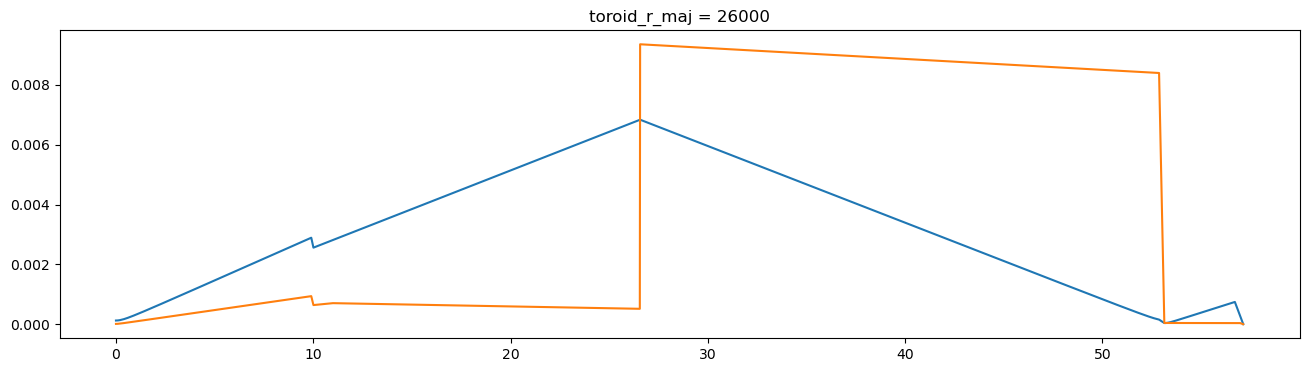

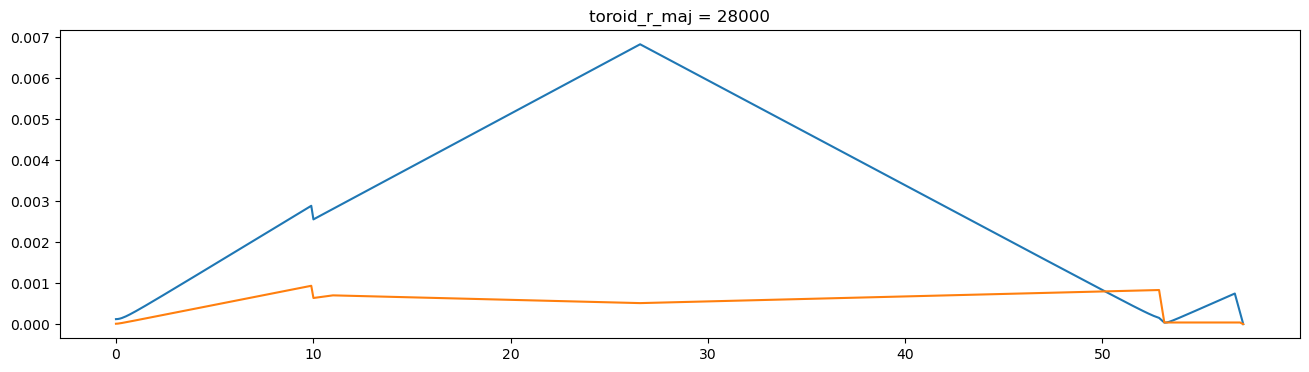

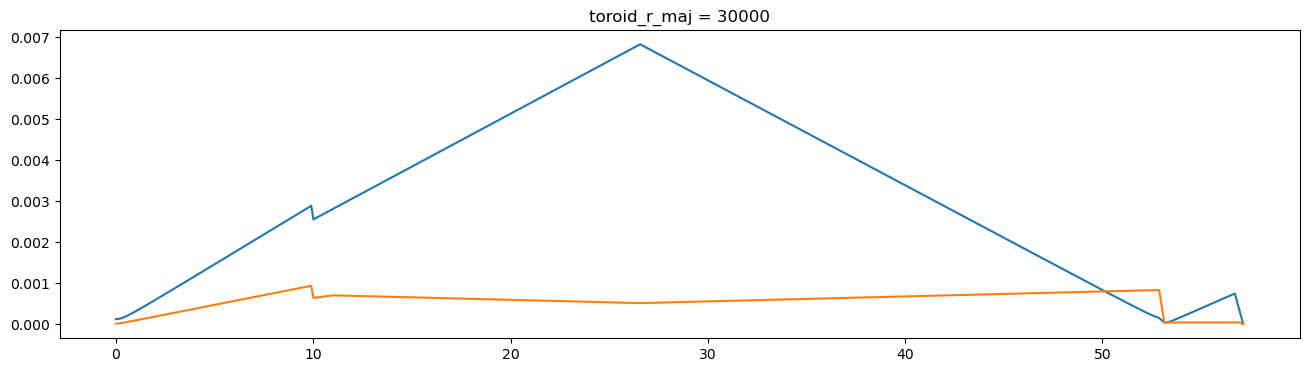

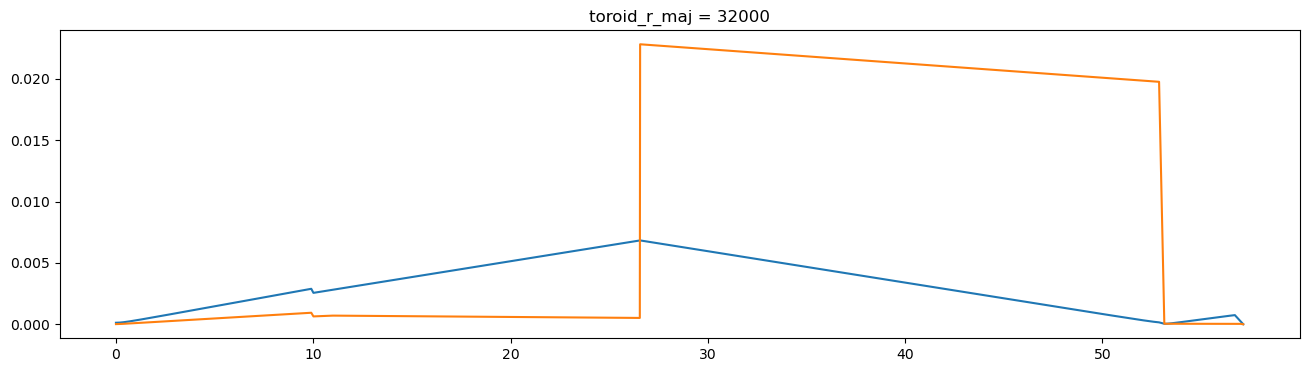

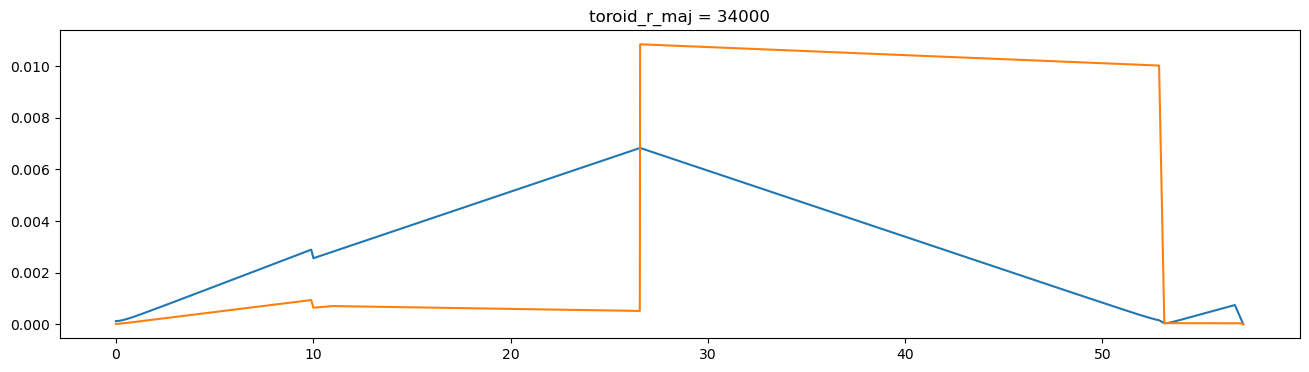

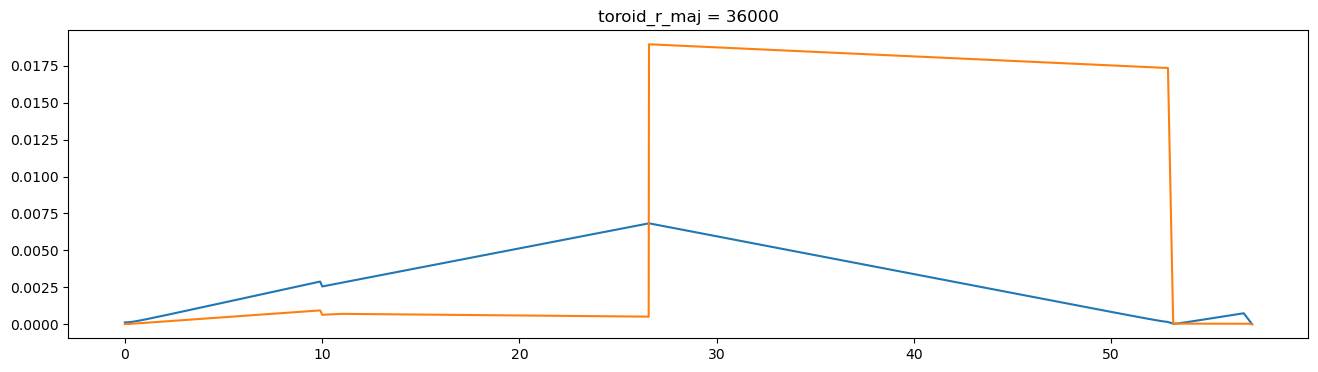

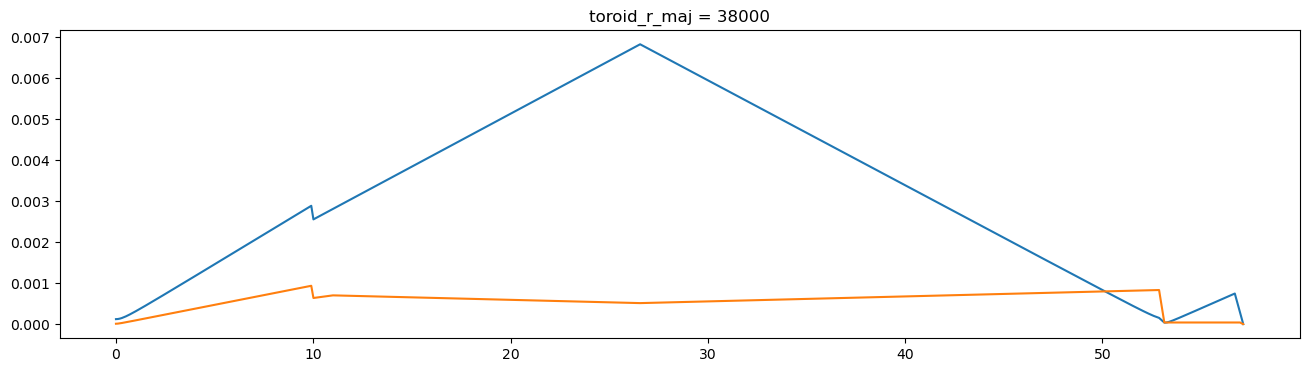

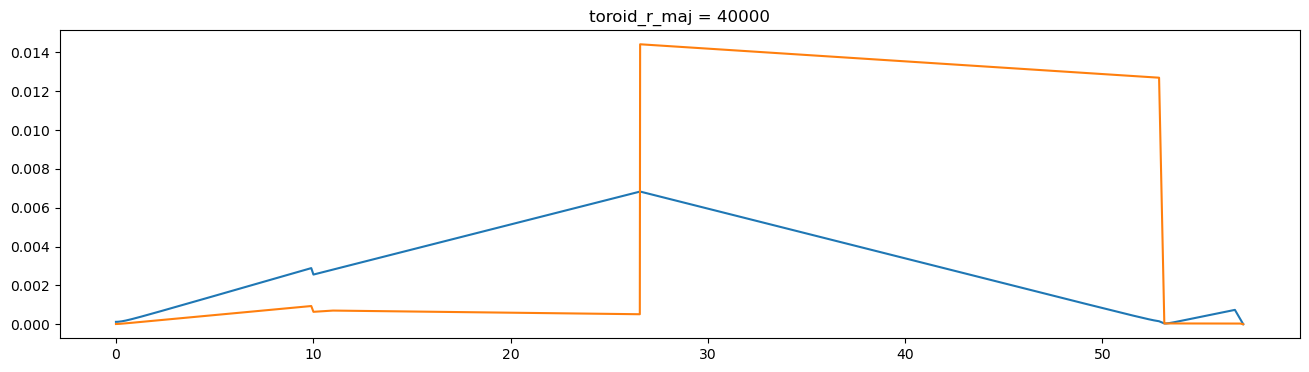

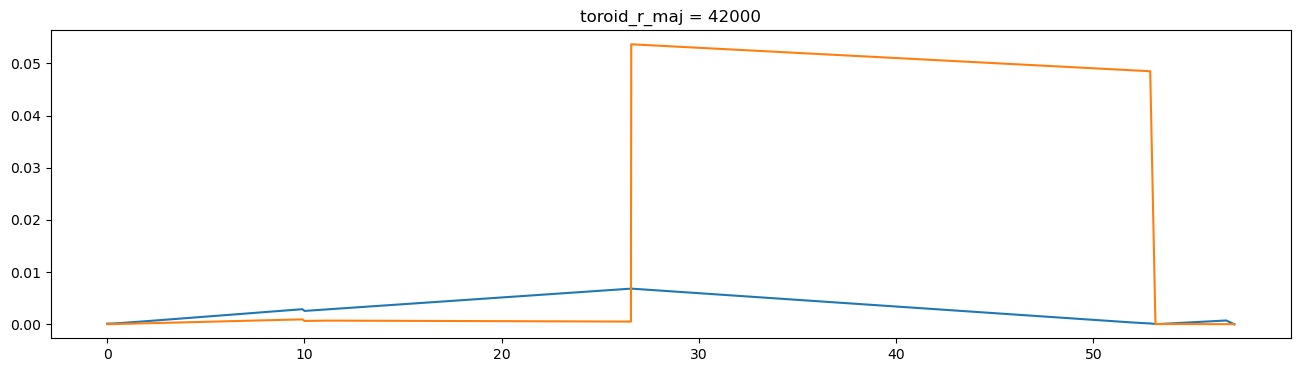

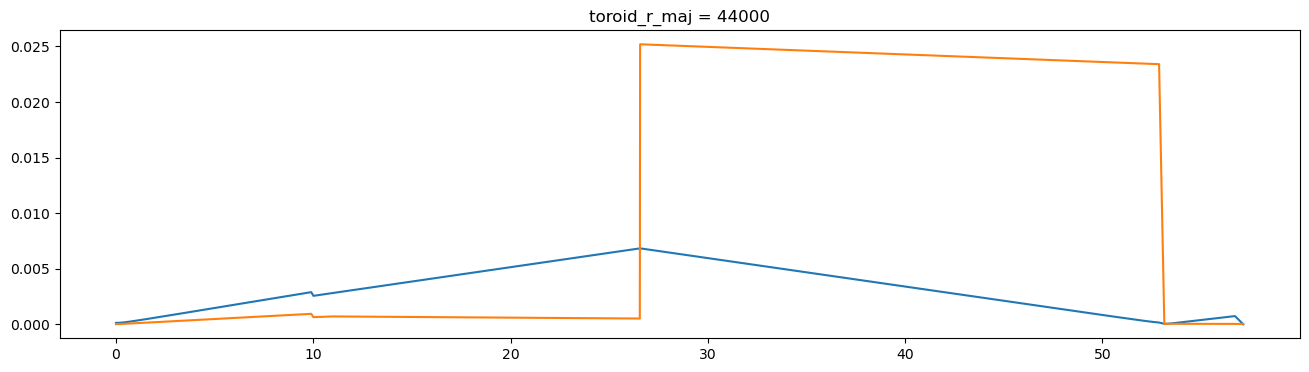

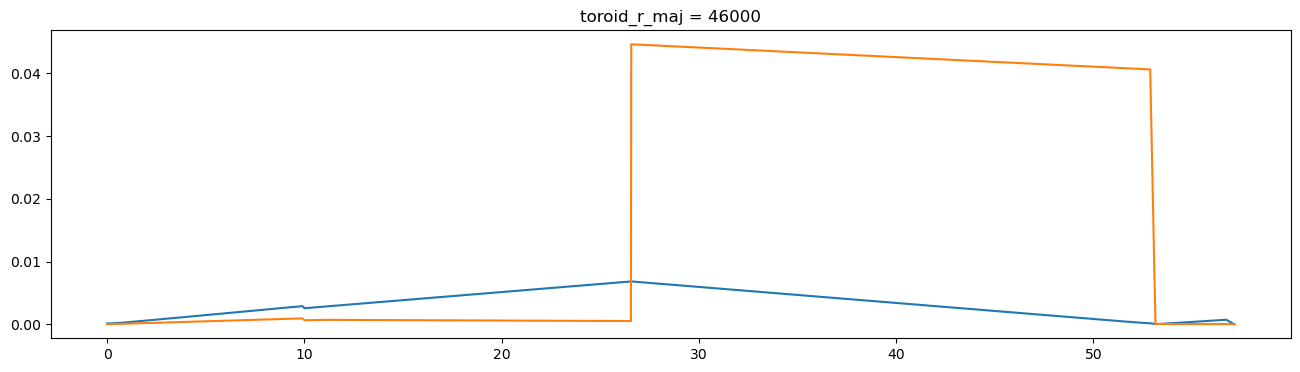

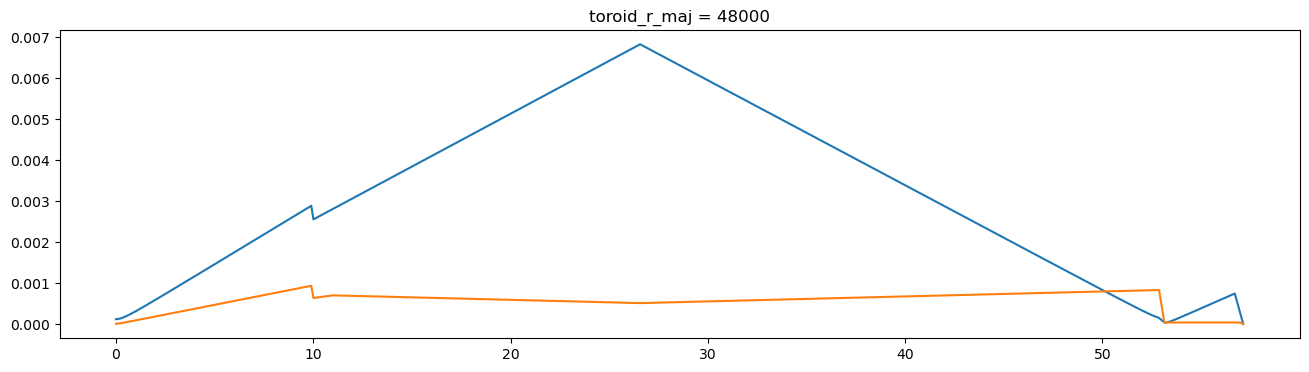

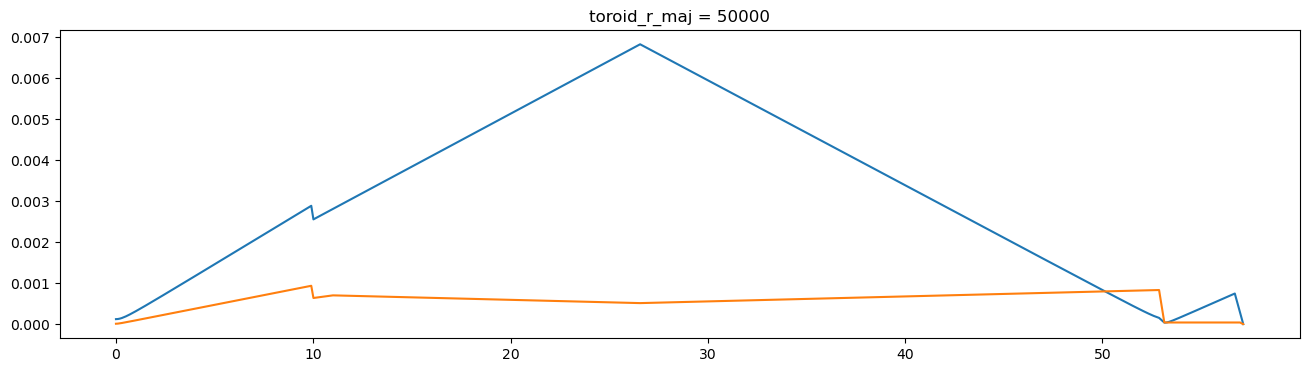

In [6]:
import json
import matplotlib.pyplot as plt

for idx in range(1, tbl["toroid_r_maj"].size + 1):
    d = json.loads(tbl["bsr_report"][idx])
    plt.figure(figsize=(16, 4))
    plt.plot(d["s"], d["sigmax"])
    plt.plot(d["s"], d["sigmaz"])
    plt.title(f"toroid_r_maj = {tbl['toroid_r_maj'][idx]:.0f}")

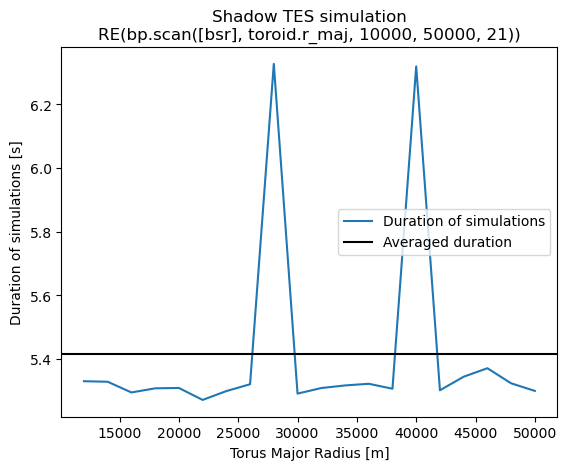

In [7]:
data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()